# Simulación de trayectorias

En este apartado simularemos diversas trayectorias del AR(1) con coeficientes distintos.

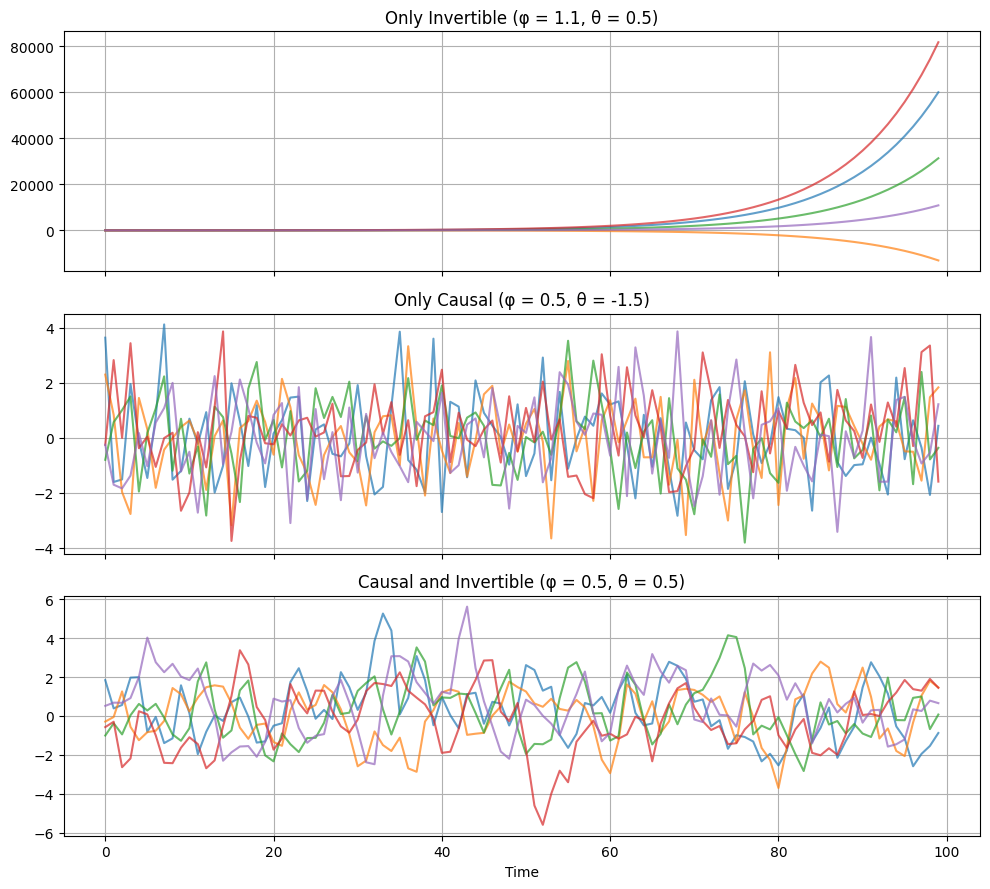

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_arma11(phi, theta, n=100, sigma=1):
    eps = np.random.normal(0, sigma, n + 1)
    X = np.zeros(n + 1)
    for t in range(1, n + 1):
        X[t] = phi * X[t - 1] + eps[t] + theta * eps[t - 1]
    return X[1:]  # descartamos X[0]

# Configuración
n = 100
num_trajectories = 5

# Modelos: (phi, theta, nombre)
models = [
    (1.1, 0.5, "Only Invertible (φ = 1.1, θ = 0.5)"),
    (0.5, -1.5, "Only Causal (φ = 0.5, θ = -1.5)"),
    (0.5, 0.5, "Causal and Invertible (φ = 0.5, θ = 0.5)")
]

# Gráficos
fig, axes = plt.subplots(3, 1, figsize=(10, 9), sharex=True)

for i, (phi, theta, title) in enumerate(models):
    for _ in range(num_trajectories):
        X = simulate_arma11(phi, theta, n)
        axes[i].plot(X, alpha=0.7)
    axes[i].set_title(title)
    axes[i].grid(True)

axes[-1].set_xlabel("Time")
plt.tight_layout()
plt.show()
plt.savefig('trayectorias.png')

# Validación empírica

En este apartado validaremos la esperanza y la varianza de un modelo AR(1).

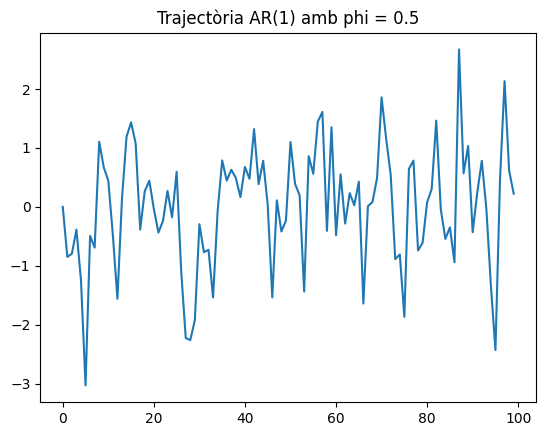

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_ar1(phi, n=100, sigma=1):
    eps = np.random.normal(0, sigma, n)
    X = np.zeros(n)
    for t in range(1, n):
        X[t] = phi * X[t-1] + eps[t]
    return X

X = simulate_ar1(0.5)
plt.plot(X)
plt.title('Trajectòria AR(1) amb phi = 0.5')
plt.show()

In [16]:
N = 1000
phi = 0.5
n = 10000
sigma = 1
means = []
variances = []

for _ in range(N):
    X = simulate_ar1(phi, n, sigma)
    means.append(np.mean(X))
    variances.append(np.var(X))

print("Mitjana de esperànces estimada:", np.mean(means))
print("Valor teòric:", 0)
print("Mitjana de variància estimada:", np.mean(variances))
print("Valor teòric:", sigma**2 / (1 - phi**2))

Mitjana de esperànces estimada: -0.0006165876605677414
Valor teòric: 0
Mitjana de variància estimada: 1.3331420010898165
Valor teòric: 1.3333333333333333
